<a href="https://colab.research.google.com/github/syahmishamz/Data-Analytics-ML/blob/Syahmi/Solutions/ITS69304_Group1_GroupAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Clone GitHub repo

In [3]:
!git clone https://github.com/syahmishamz/Data-Analytics-ML.git

Cloning into 'Data-Analytics-ML'...
remote: Enumerating objects: 98, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 98 (delta 27), reused 15 (delta 15), pack-reused 60 (from 1)
Receiving objects: 100% (98/98), 10.98 MiB | 15.77 MiB/s, done.
Resolving deltas: 100% (34/34), done.


Load the dataset

In [74]:
file = '/content/Data-Analytics-ML/mentalhealth.csv'

#Question 1

##a)

Assign the file into a dataframe

In [75]:
data = pd.read_csv(file)
data.head(10) #Show top 10 records

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety
5,5,"every break, you must be nervous, like somethi...",Anxiety
6,6,"I feel scared, anxious, what can I do? And may...",NaN
7,7,Have you ever felt nervous but didn't know why?,NaN
8,8,"I haven't slept well for 2 days, it's like I'm...",NaN
9,9,"I'm really worried, I want to cry.",Anxiety


In [76]:
data.describe() #Show descriptive statistics

,Unnamed: 0,statement,status
count,53044,52681,53016
unique,53044,51069,7
top,0,what do you mean?,Normal
freq,1,22,16348


In [77]:
data.columns #Show variable names

Index(['Unnamed: 0', 'statement', 'status'], dtype='object')

In [78]:
data.info() #Basic info on the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53048 entries, 0 to 53047
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  53044 non-null  object
 1   statement   52681 non-null  object
 2   status      53016 non-null  object
dtypes: object(3)
memory usage: 1.2+ MB


In [79]:
data.shape #Number of records and variables (rows, columns)

(53048, 3)

In [80]:
print("Missing values:\n",data.isnull().sum()) #Check for number of missing values

Missing values:
 Unnamed: 0      4
statement     367
status         32
dtype: int64


In [81]:
clean_data = data.drop(data.columns[0], axis=1) #Drop first column ("Unnamed: 0")
clean_data.head(10) #Show top 10 records

,statement,status
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,I've shifted my focus to something else but I'...,Anxiety
4,"I'm restless and restless, it's been a month n...",Anxiety
5,"every break, you must be nervous, like somethi...",Anxiety
6,"I feel scared, anxious, what can I do? And may...",NaN
7,Have you ever felt nervous but didn't know why?,NaN
8,"I haven't slept well for 2 days, it's like I'm...",NaN
9,"I'm really worried, I want to cry.",Anxiety


In [84]:
print("Missing values:\n",clean_data.isnull().sum()) #Check for number of missing values

Missing values:
 statement     0
status       32
dtype: int64


In [83]:
#Fill empty records in 'statement' variable with 'Unknown'
clean_data.fillna({"statement": "Unknown"}, inplace=True)
print("Missing values:\n",clean_data.isnull().sum()) #Check for number of missing values

Missing values:
 statement     0
status       32
dtype: int64


In [85]:
clean_data.shape #Number of records and variables (rows, columns)

(53048, 2)

In [86]:
duplicates = clean_data.duplicated()
num_duplicates = duplicates.sum() #Count number of duplicated rows
print(f"Number of duplicated rows: {num_duplicates}")

Number of duplicated rows: 1948


Handling duplicated rows

In [87]:
clean_data.drop_duplicates(inplace=True)  #Remove duplicate rows
clean_data.reset_index(drop=True, inplace=True)  #Reset the index

In [88]:
duplicates = clean_data.duplicated()
num_duplicates = duplicates.sum() #Count number of duplicated rows
print(f"Number of duplicated rows: {num_duplicates}")

Number of duplicated rows: 0


In [89]:
print("Missing values:\n",clean_data.isnull().sum()) #Check for number of missing values

Missing values:
 statement     0
status       28
dtype: int64


In [90]:
status_count = clean_data.status.value_counts().sort_values()
status_count

,count
status,
Personality disorder,894
Stress,2297
Bipolar,2498
Anxiety,3621
Suicidal,10637
Depression,15088
Normal,16037


In [91]:
clean_data["status"] = clean_data["status"].apply(lambda x: "Normal" if x == "Normal" else "Depression")
status_count= clean_data["status"].value_counts().sort_values()
status_count

,count
status,
Normal,16037
Depression,35063


In [92]:
#Replace missing values in 'status' variable with most frequent category
clean_data['status'] = clean_data['status'].fillna(clean_data['status'].mode()[0])

In [93]:
# Verify the imputation by checking for missing values again
print("Missing values:\n", clean_data.isnull().sum())

Missing values:
 statement    0
status       0
dtype: int64


In [94]:
clean_data.head(10) #Show top 10 records of new dataframe

,statement,status
0,oh my gosh,Depression
1,"trouble sleeping, confused mind, restless hear...",Depression
2,"All wrong, back off dear, forward doubt. Stay ...",Depression
3,I've shifted my focus to something else but I'...,Depression
4,"I'm restless and restless, it's been a month n...",Depression
5,"every break, you must be nervous, like somethi...",Depression
6,"I feel scared, anxious, what can I do? And may...",Depression
7,Have you ever felt nervous but didn't know why?,Depression
8,"I haven't slept well for 2 days, it's like I'm...",Depression
9,"I'm really worried, I want to cry.",Depression


In [95]:
from sklearn.preprocessing import LabelEncoder

le_status = LabelEncoder()

# Fit the encoder to the 'status' column and transform it
clean_data['status_encoded'] = le_status.fit_transform(clean_data['status'])

# Drop the original 'status' column
clean_data = clean_data.drop('status', axis=1)

# Display the updated dataframe to confirm the changes
clean_data.head(10)

,statement,status_encoded
0,oh my gosh,0
1,"trouble sleeping, confused mind, restless hear...",0
2,"All wrong, back off dear, forward doubt. Stay ...",0
3,I've shifted my focus to something else but I'...,0
4,"I'm restless and restless, it's been a month n...",0
5,"every break, you must be nervous, like somethi...",0
6,"I feel scared, anxious, what can I do? And may...",0
7,Have you ever felt nervous but didn't know why?,0
8,"I haven't slept well for 2 days, it's like I'm...",0
9,"I'm really worried, I want to cry.",0


In [99]:
# Get the mapping between encoded values and original status labels
label_mapping = dict(zip(le_status.classes_, le_status.transform(le_status.classes_)))

# Print the mapping
for status, encoded_value in label_mapping.items():
    print(f"Status: {status}, Encoded Value: {encoded_value}")

Status: Depression, Encoded Value: 0
Status: Normal, Encoded Value: 1


In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Prepare the data
X = clean_data['statement']  #Predictor variable
y = clean_data['status_encoded']  #Target variable

# 2. Create a TF-IDF vectorizer to transform text data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

# 3. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Create and train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [97]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

#Make predictions on the testing data
y_pred = model.predict(X_test)

#Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

#Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.9078
Precision: 0.8556
Recall: 0.8550


In [ ]:
from sklearn.neural_network import MLPClassifier

# 1. Create and train the Neural Network model
model_nn = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
model_nn.fit(X_train, y_train)

In [ ]:
# 2. Make predictions on the testing data
y_pred_nn = model_nn.predict(X_test)

# 3. Calculate the evaluation metrics
accuracy_nn = accuracy_score(y_test, y_pred_nn)
precision_nn = precision_score(y_test, y_pred_nn)
recall_nn = recall_score(y_test, y_pred_nn)

# 4. Print the results
print("Neural Network Metrics:")
print(f"Accuracy: {accuracy_nn:.4f}")
print(f"Precision: {precision_nn:.4f}")
print(f"Recall: {recall_nn:.4f}")

For Decision Tree

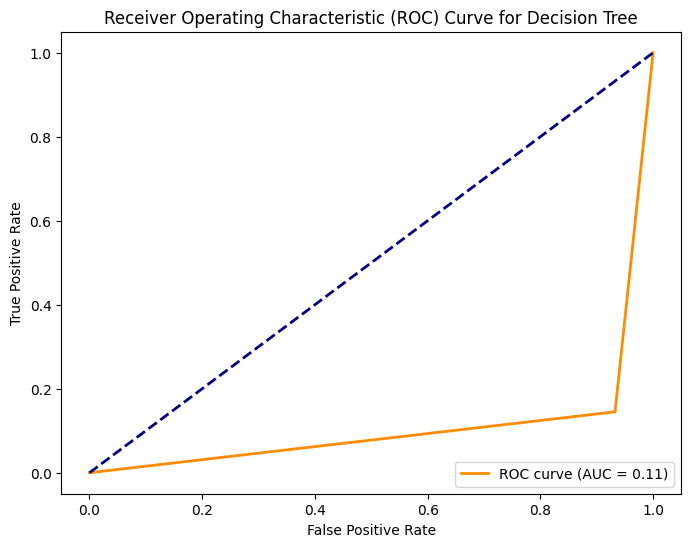

In [107]:
from sklearn.metrics import roc_curve, auc

# 1. Get predicted probabilities
y_probs = model.predict_proba(X_test)[:, 0]  # Probability of class 0 (Depression)

# 2. Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# 3. Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree')
plt.legend(loc='lower right')
plt.show()

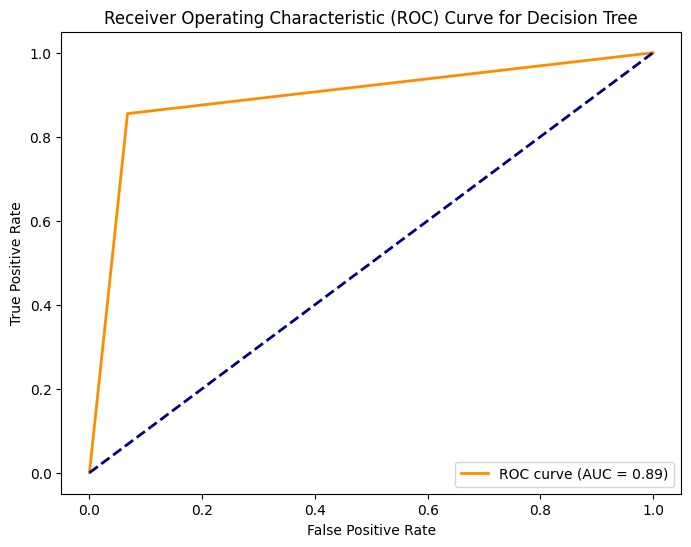

In [108]:
# 1. Get predicted probabilities
y_probs = model.predict_proba(X_test)[:, 1]  # Probability of class 1 (Normal)

# 2. Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# 3. Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree')
plt.legend(loc='lower right')
plt.show()

For NN

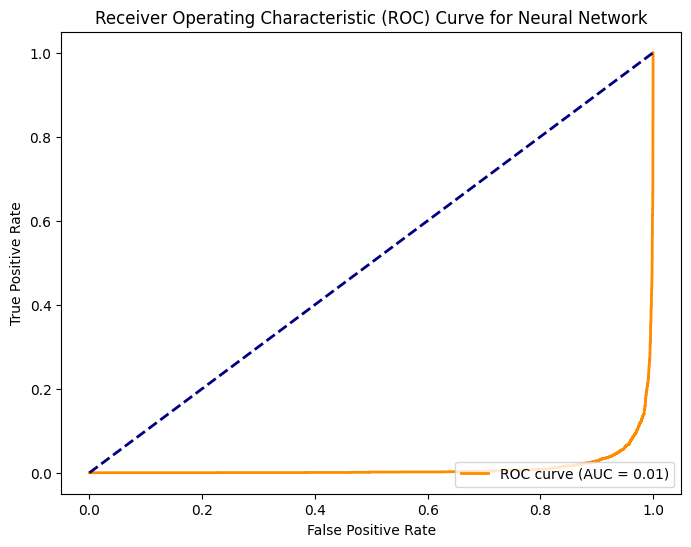

In [109]:
# 1. Get predicted probabilities
y_probs_nn = model_nn.predict_proba(X_test)[:, 0]  #Probability of class 0 (Depression)

# 2. Calculate ROC curve
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, y_probs_nn)
roc_auc_nn = auc(fpr_nn, tpr_nn)

# 3. Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_nn, tpr_nn, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_nn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Neural Network')
plt.legend(loc='lower right')
plt.show()

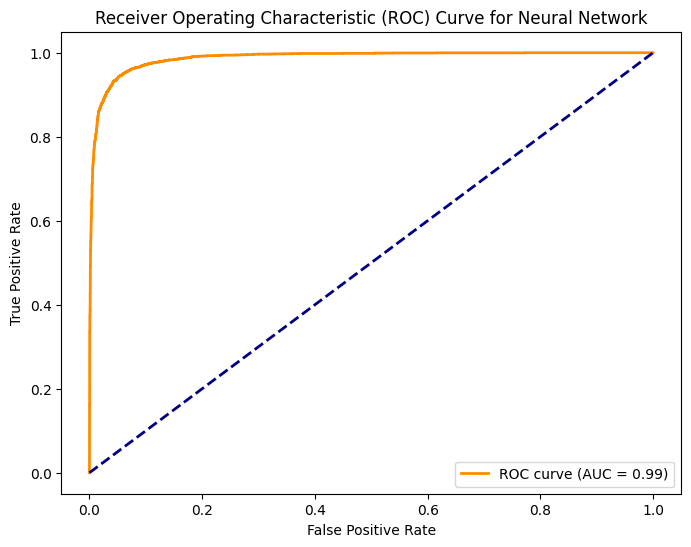

In [110]:
# 1. Get predicted probabilities
y_probs_nn = model_nn.predict_proba(X_test)[:, 1]  # Probability of class 1 (Normal)

# 2. Calculate ROC curve
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, y_probs_nn)
roc_auc_nn = auc(fpr_nn, tpr_nn)

# 3. Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_nn, tpr_nn, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_nn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Neural Network')
plt.legend(loc='lower right')
plt.show()

  Predicts the sentiment label (0 for 'Depression', 1 for 'Normal') for a given text using the Decision Tree model

In [111]:

def get_sentiment_label(text):
  text_vectorized = vectorizer.transform([text]) #The input text for sentiment analysis
  prediction = model.predict(text_vectorized)[0] #The predicted sentiment label (0 or 1)
  if prediction == 0:
    print("Depression")
  else:
    print("Normal")
  return prediction


Predicts the sentiment label (0 for 'Depression', 1 for 'Normal') for a given text using the Neural Network model

In [112]:
# prompt: Create a function to output the Sentiment Analysis Label of a sentence, 0 is 'Depression' and 1 is 'Normal' for neural network

def get_sentiment_label_nn(text):
  text_vectorized = vectorizer.transform([text]) #The input text for sentiment analysis
  prediction = model_nn.predict(text_vectorized)[0] #The predicted sentiment label (0 or 1)
  if prediction == 0:
    print("Depression")
  else:
    print("Normal")
  return prediction


Test Statements (Decision Tree)

In [113]:
get_sentiment_label("I can't stop worrying about everything")
get_sentiment_label("I've been working hard, and seeing the results makes me feel incredibly happy and fulfilled")
get_sentiment_label("Even the smallest things feel like too much right now")
get_sentiment_label("I can’t stop smiling")
get_sentiment_label("Today has been amazing!")

Depression
Normal
Depression
Normal
Normal


1

Test Statements (NN)

In [114]:
get_sentiment_label_nn("I can't stop worrying about everything")
get_sentiment_label_nn("I've been working hard, and seeing the results makes me feel incredibly happy and fulfilled")
get_sentiment_label_nn("Even the smallest things feel like too much right now")
get_sentiment_label_nn("I can’t stop smiling")
get_sentiment_label_nn("Today has been amazing!")

Depression
Depression
Depression
Depression
Normal


1

##b)

Number of categories of status variable in ascending order

In [ ]:
status_count = clean_data.status.value_counts().sort_values()
status_count

,count
status,
Personality disorder,1199
Stress,2669
Bipolar,2873
Anxiety,3881
Suicidal,10647
Depression,15399
Normal,16380


Visualise status variable on a chart

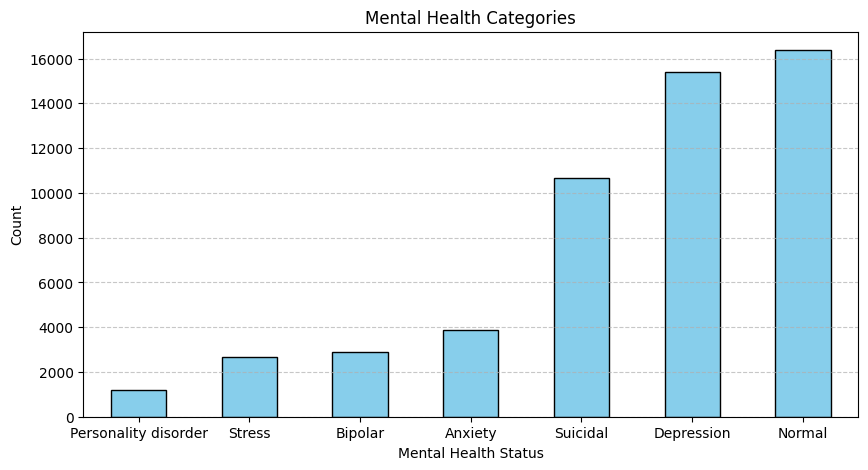

In [ ]:
plt.figure(figsize=(10, 5))
status_count.plot(kind="bar", color="skyblue", edgecolor="black")

plt.xlabel("Mental Health Status")
plt.ylabel("Count")
plt.title("Mental Health Categories")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Convert status to binary classification

In [ ]:
clean_data["status"] = clean_data["status"].apply(lambda x: "Normal" if x == "Normal" else "Depression")
status_count= clean_data["status"].value_counts().sort_values()
status_count

,count
status,
Normal,16380
Depression,36668


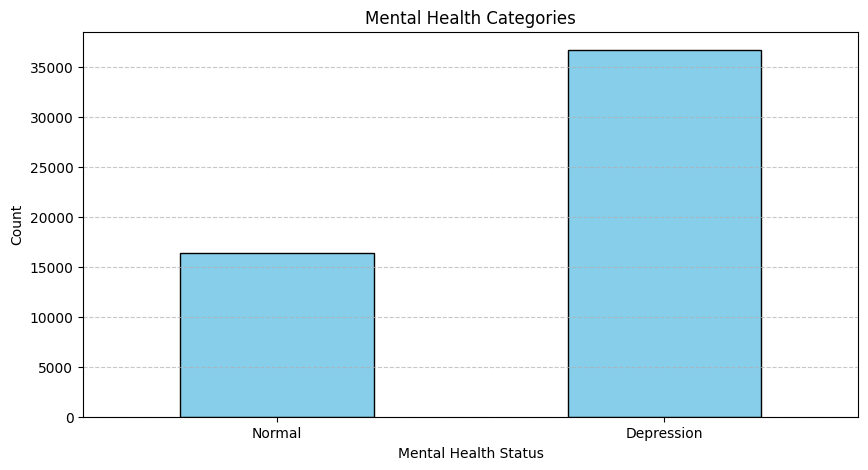

In [ ]:
plt.figure(figsize=(10, 5))
status_count.plot(kind="bar", color="skyblue", edgecolor="black")

plt.xlabel("Mental Health Status")
plt.ylabel("Count")
plt.title("Mental Health Categories")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

#Question 2

##a)

##b)

#Question 3

##a)

##b)

#Question 4

##a)